In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


fb_stat = pd.read_csv('Documents/facebook_ads_data.csv')
fb_stat.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [212]:
fb_stat.describe()

,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
count,1494.000000,1494.000000,1494.000000,1494.000000,1443.000000,1462.000000,1462.000000,1462.000000
mean,131.035964,34190.182062,318.840696,165.457450,0.814712,5.085677,0.011947,1.326322
std,214.968986,44433.507387,485.663099,274.764573,1.705224,8.107076,0.013192,0.343012
min,0.000000,0.000000,0.000000,0.000000,0.010000,0.050000,0.000000,0.751445
25%,18.047500,8377.000000,62.250000,24.350000,0.170000,1.500000,0.004462,1.067832
50%,48.515000,15983.000000,148.000000,65.460000,0.350000,2.775000,0.007845,1.299482
75%,161.790000,45849.750000,371.750000,196.595000,0.765000,5.275000,0.015005,1.527423
max,2035.490000,456481.000000,6199.000000,2562.600000,24.790000,114.150000,0.159223,2.486911


In [213]:
fb_stat['ad_date'] = pd.to_datetime(fb_stat['ad_date'])
fb_stat.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [214]:
fb_stat.dtypes

ad_date              datetime64[ns]
campaign_name                object
total_spend                 float64
total_impressions             int64
total_clicks                  int64
total_value                 float64
cpc                         float64
cpm                         float64
ctr                         float64
romi                        float64
dtype: object

In [215]:
daily_total_spend = fb_stat[(fb_stat['ad_date'].dt.year == 2021)].groupby('ad_date', as_index=False)['total_spend'].sum()
daily_total_romi = fb_stat[(fb_stat['ad_date'].dt.year == 2021)].groupby('ad_date', as_index=False)['romi'].mean()

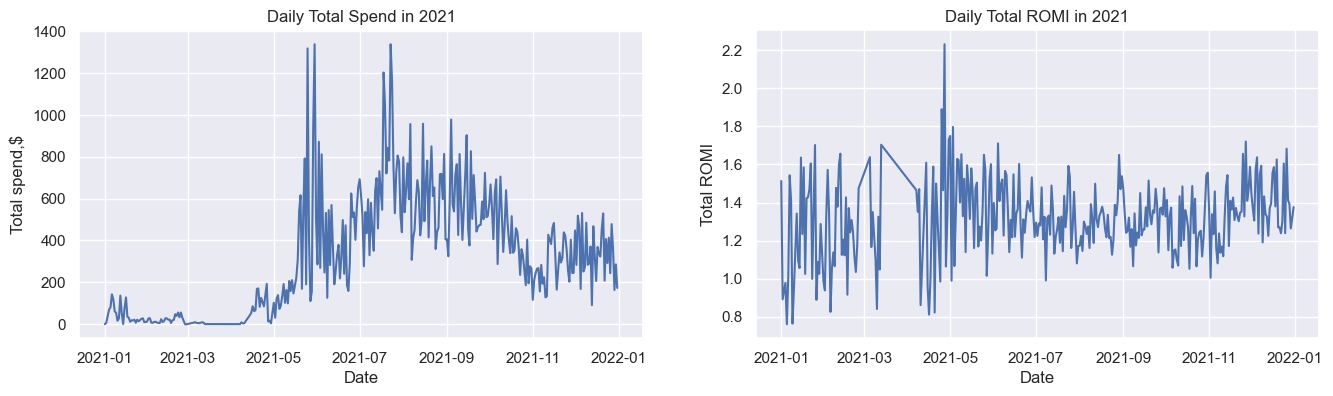

In [216]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4))

sns.set()

sns.lineplot(x='ad_date', y='total_spend', data=daily_total_spend, ax=ax[0])
ax[0].set_title('Daily Total Spend in 2021')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Total spend,$')

sns.lineplot(x='ad_date', y='romi', data=daily_total_romi, ax=ax[1])
ax[1].set_title('Daily Total ROMI in 2021')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Total ROMI')

plt.show()

In [217]:
rolling_daily_total_spend = fb_stat[(fb_stat['ad_date'].dt.year == 2021)].groupby('ad_date', as_index=False)['total_spend'].rolling(2).sum()
rolling_daily_total_romi = fb_stat[(fb_stat['ad_date'].dt.year == 2021)].groupby('ad_date', as_index=False)['romi'].rolling(2).mean()

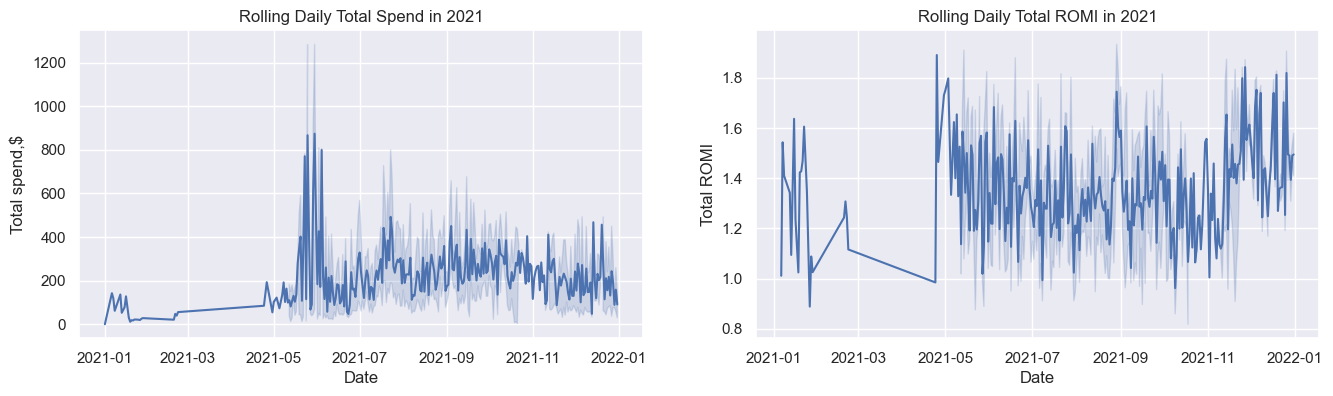

In [218]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4))

sns.set()

sns.lineplot(x='ad_date', y='total_spend', data=rolling_daily_total_spend, ax=ax[0])
ax[0].set_title('Rolling Daily Total Spend in 2021')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Total spend,$')

sns.lineplot(x='ad_date', y='romi', data=rolling_daily_total_romi, ax=ax[1])
ax[1].set_title('Rolling Daily Total ROMI in 2021')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Total ROMI')

plt.show()

In [219]:
company_name = fb_stat.groupby('campaign_name', as_index=False)
spend_by_company = company_name['total_value'].sum().sort_values('total_value')
romi_by_company = company_name['romi'].mean().sort_values('romi')

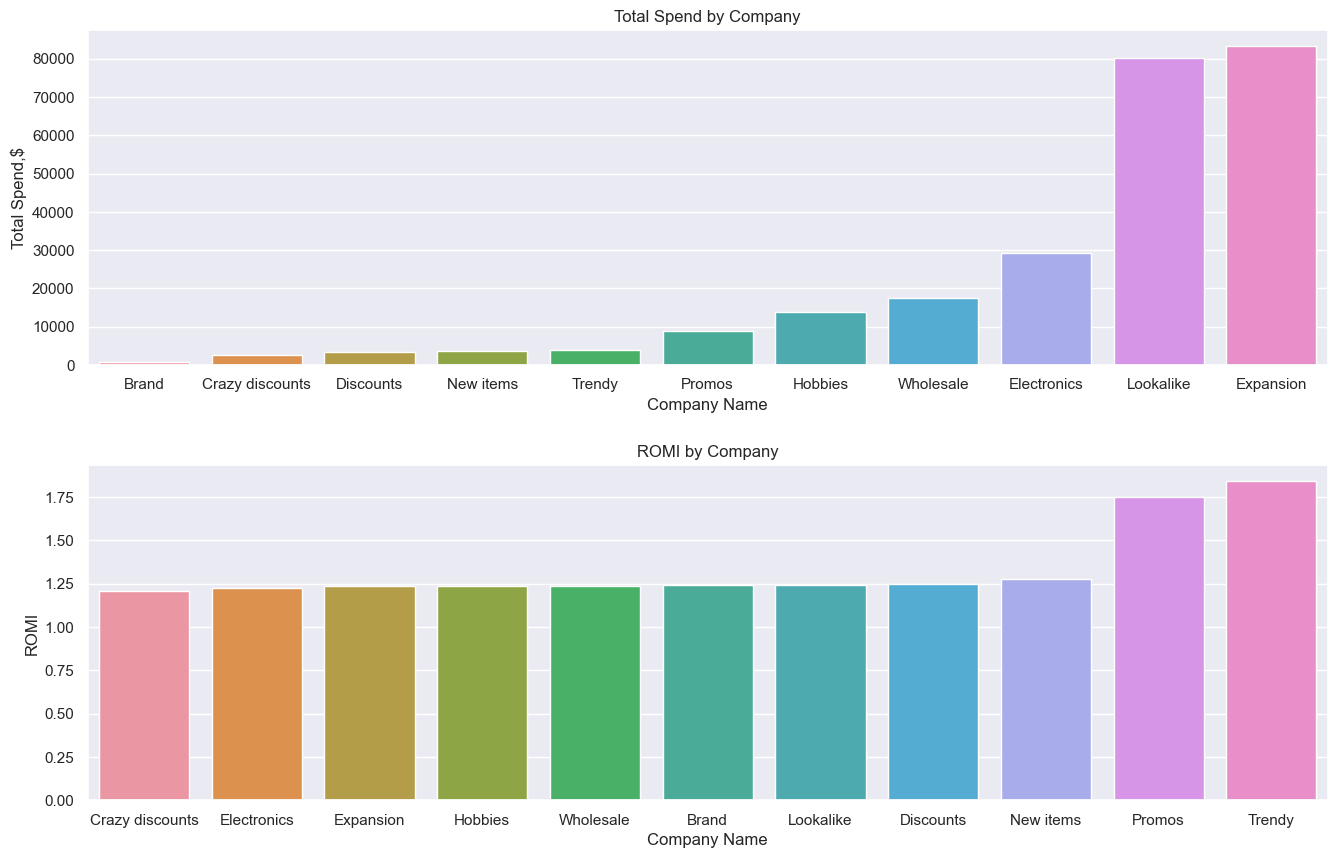

In [220]:
fig, ax = plt.subplots(nrows=2, figsize=(16, 10))

sns.set()

sns.barplot(x='campaign_name', y='total_value', data=spend_by_company , ax=ax[0])
ax[0].set_title('Total Spend by Company')
ax[0].set_xlabel('Company Name')
ax[0].set_ylabel('Total Spend,$')

sns.barplot(x='campaign_name', y='romi', data=romi_by_company, ax=ax[1])
ax[1].set_title('ROMI by Company')
ax[1].set_xlabel('Company Name')
ax[1].set_ylabel('ROMI')

plt.subplots_adjust(hspace=0.3)
plt.show()

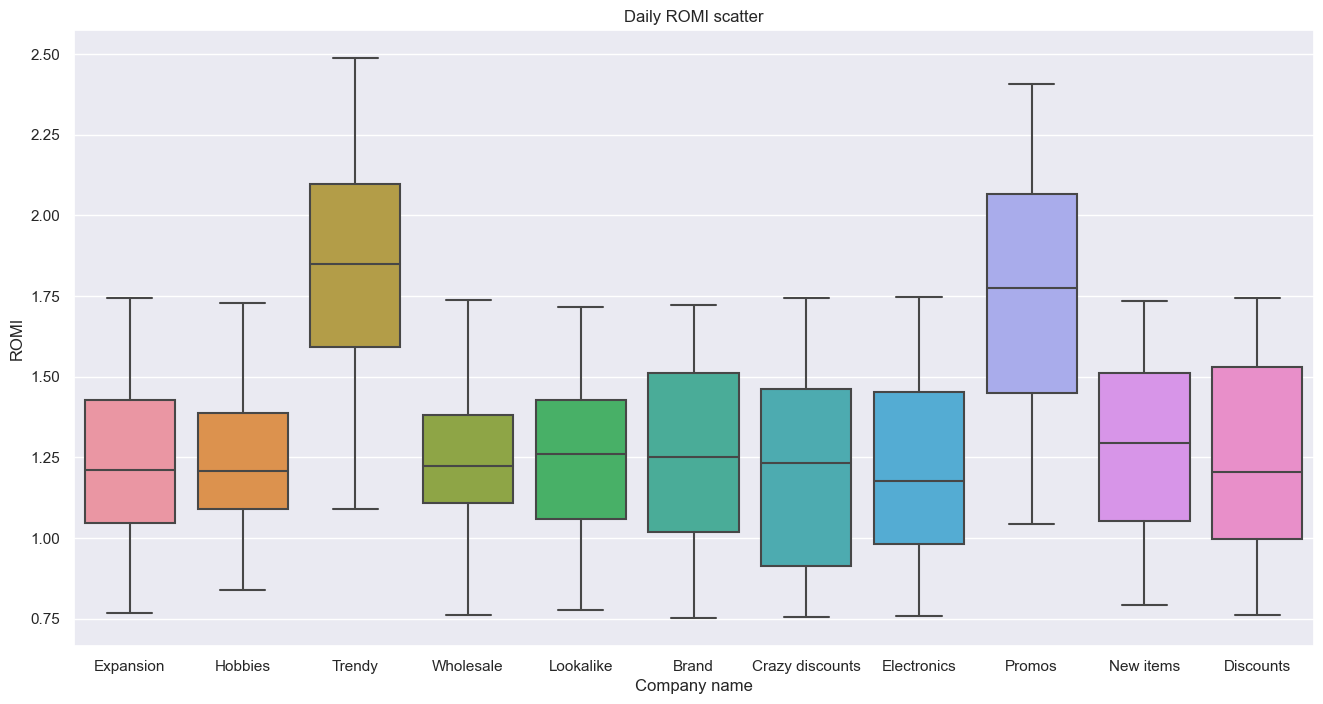

In [221]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=fb_stat, x='campaign_name', y='romi')
plt.title('Daily ROMI scatter')
plt.xlabel('Company name')
plt.ylabel('ROMI')
plt.show()

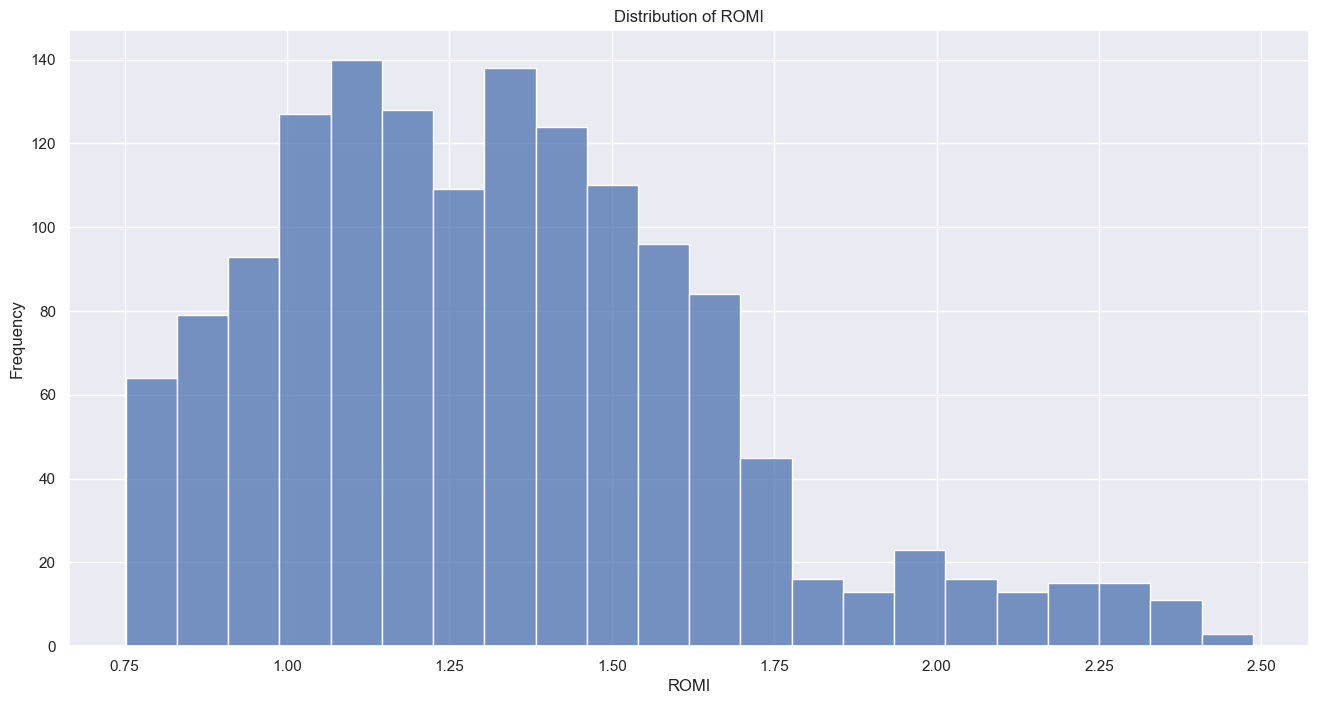

In [222]:
plt.figure(figsize=(16, 8))
sns.histplot(data=fb_stat, x='romi')
plt.title('Distribution of ROMI')
plt.xlabel('ROMI')
plt.ylabel('Frequency')
plt.show()

In [223]:
numeric_columns = fb_stat.select_dtypes(include=['int', 'float']).columns
corr = fb_stat[numeric_columns].corr()
corr

,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
total_spend,1.000000,0.475607,0.480066,0.978890,0.262254,0.482027,-0.025495,-0.114859
total_impressions,0.475607,1.000000,0.765489,0.472037,-0.093097,-0.121094,-0.155701,-0.099520
total_clicks,0.480066,0.765489,1.000000,0.472124,-0.159521,-0.032829,0.200440,-0.101495
total_value,0.978890,0.472037,0.472124,1.000000,0.250851,0.471338,-0.022267,-0.013733
cpc,0.262254,-0.093097,-0.159521,0.250851,1.000000,0.593732,-0.210719,-0.076911
cpm,0.482027,-0.121094,-0.032829,0.471338,0.593732,1.000000,0.116213,-0.062676
ctr,-0.025495,-0.155701,0.200440,-0.022267,-0.210719,0.116213,1.000000,-0.049992
romi,-0.114859,-0.099520,-0.101495,-0.013733,-0.076911,-0.062676,-0.049992,1.000000


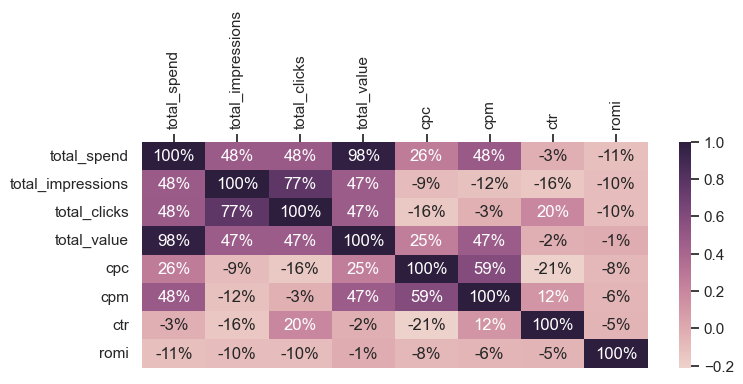

In [224]:
plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(corr, annot = True, fmt='.0%', cmap = sns.cubehelix_palette(as_cmap=True))
heatmap.xaxis.tick_top()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [225]:
highest_correlation = corr.idxmax().max()
lowest_correlation = corr.idxmin().min()

print("Metric with the highest correlation:", highest_correlation)
print("Metric with the lowest correlation:", lowest_correlation)

Metric with the highest correlation: total_value
Metric with the lowest correlation: cpc


In [226]:
total_value_corr = corr['total_value'].sort_values(ascending=False)

print("Total value correlated with:", total_value_corr.drop('total_value').index.tolist())

Total value correlated with: ['total_spend', 'total_clicks', 'total_impressions', 'cpm', 'cpc', 'romi', 'ctr']


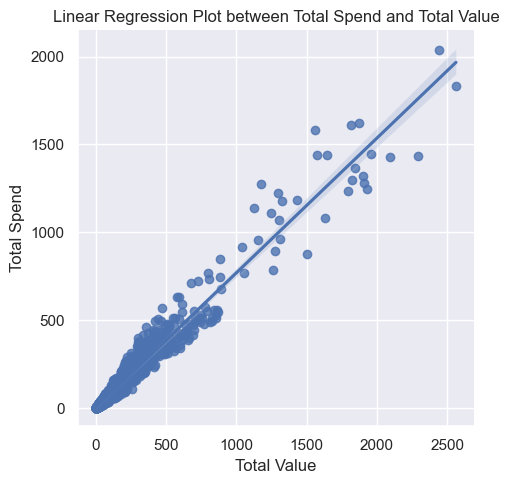

In [227]:
sns.lmplot(data=fb_stat, x="total_value", y="total_spend")
plt.xlabel('Total Value')
plt.ylabel('Total Spend')
plt.title('Linear Regression Plot between Total Spend and Total Value')
plt.tight_layout()

import warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

plt.show()